In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#reading csv file
monet_data = pd.read_csv('/content/monet.csv')
monet_data

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE
0,3.993780,21.3,25.6,1,1,1
1,8.800000,31.9,25.6,1,2,2
2,0.131694,6.9,15.9,0,3,3
3,2.037500,25.7,32.0,1,4,2
4,1.487500,25.7,32.0,1,4,2
...,...,...,...,...,...,...
425,5.282500,25.6,39.4,1,375,1
426,9.352500,25.9,39.6,1,375,2
427,8.252500,25.6,39.6,1,375,1
428,3.410000,25.6,39.4,1,386,2


In [ ]:
#data cleaning
monet_data['HOUSE'] = monet_data['HOUSE ']

In [ ]:
monet_data.shape

(430, 7)

In [ ]:
monet_data.describe()

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE,HOUSE
count,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000
mean,3.089996,27.646977,32.111395,0.820930,182.644186,1.611628,1.611628
std,4.311260,10.097013,10.459677,0.383857,109.091529,0.591592,0.591592
min,0.010413,3.900000,6.700000,0.000000,1.000000,1.000000,1.000000
25%,0.600153,23.125000,28.525000,1.000000,87.250000,1.000000,1.000000
50%,1.312782,25.600000,31.900000,1.000000,179.500000,2.000000,2.000000
75%,3.850000,31.450000,36.200000,1.000000,274.750000,2.000000,2.000000
max,33.013504,78.700000,89.000000,1.000000,387.000000,3.000000,3.000000


In [ ]:
monet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PRICE    430 non-null    float64
 1   HEIGHT   430 non-null    float64
 2   WIDTH    430 non-null    float64
 3   SIGNED   430 non-null    int64  
 4   PICTURE  430 non-null    int64  
 5   HOUSE    430 non-null    int64  
 6   HOUSE    430 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 23.6 KB


In [ ]:
#adjustments to data
monet_data['SIZE'] = monet_data['HEIGHT'] * monet_data['WIDTH']
monet_data

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE,HOUSE,SIZE
0,3.993780,21.3,25.6,1,1,1,1,545.28
1,8.800000,31.9,25.6,1,2,2,2,816.64
2,0.131694,6.9,15.9,0,3,3,3,109.71
3,2.037500,25.7,32.0,1,4,2,2,822.40
4,1.487500,25.7,32.0,1,4,2,2,822.40
...,...,...,...,...,...,...,...,...
425,5.282500,25.6,39.4,1,375,1,1,1008.64
426,9.352500,25.9,39.6,1,375,2,2,1025.64
427,8.252500,25.6,39.6,1,375,1,1,1013.76
428,3.410000,25.6,39.4,1,386,2,2,1008.64


Text(0, 0.5, 'PRICE')

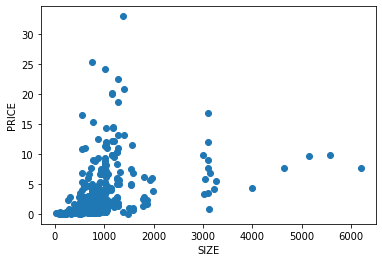

In [ ]:
#plotting variables needed
plt.scatter(monet_data['SIZE'],monet_data['PRICE'])
plt.xlabel('SIZE')
plt.ylabel('PRICE')

In [ ]:
#independent & dependent variables
X1 = monet_data['SIZE']
y1 = monet_data['PRICE']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#splitting data
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
import numpy as np

In [ ]:
X1_train = np.array(X1_train).reshape(-1,1)
y1_train = np.array(y1_train).reshape(-1,1)

In [ ]:
#training the model
model1 = LinearRegression(fit_intercept=True,normalize=True)
model1.fit(X1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
model1.intercept_

array([1.02570299])

In [ ]:
model1.coef_

array([[0.00236759]])

In [ ]:
#predicting the test data
X1_test = np.array(X1_test).reshape(-1,1)
y1_test = np.array(y1_test).reshape(-1,1)
y1_pred = model1.predict(X1_test)

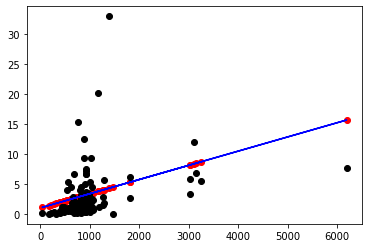

In [ ]:
#plotting true test data with predicted data
plt.scatter(X1_test,y1_pred,c='red')
plt.scatter(X1_test,y1_test,c='black')
plt.plot(X1_test, y1_pred,c = 'blue')

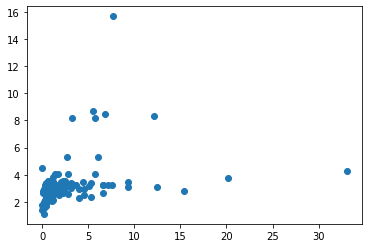

In [ ]:
plt.scatter(y1_test,y1_pred)

In [ ]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [ ]:
#model evaluations
cross_val_score(model1, X1_train, y1_train, cv=10).mean()

0.10566279424825556

In [ ]:
#error calculation
print('MAE:', metrics.mean_absolute_error(y1_test,y1_pred))
print('MSE:', metrics.mean_squared_error(y1_test,y1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y1_test,y1_pred)))
print('R2 Square:', metrics.r2_score(y1_test,y1_pred))

MAE: 2.4024378443329515
MSE: 15.451216207025672
RMSE: 3.9308035065398106
R2 Square 0.07842055918194901


(array([ 3., 91., 23.,  8.,  1.,  1.,  1.,  0.,  0.,  1.]),
 array([-7.98983556, -4.31856288, -0.6472902 ,  3.02398249,  6.69525517,
        10.36652785, 14.03780054, 17.70907322, 21.3803459 , 25.05161858,
        28.72289127]),
 <a list of 10 Patch objects>)

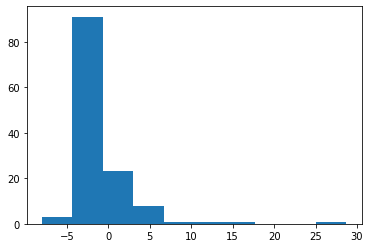

In [ ]:
plt.hist((y1_test - y1_pred), bins = 10)

In [ ]:
#multivariate regression
#3 independent variables 1 dependent variable 
X2 = monet_data[['SIZE','SIGNED','HOUSE']]
y2 = monet_data['PRICE']

In [ ]:
#following same approach as above
#splitting data
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.3, random_state = 42)

In [ ]:
#training data
model2 = LinearRegression(fit_intercept=True,normalize=True)
model2.fit(X2_train,y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
#model coefficients
model2.intercept_

-2.2334136794424904

In [ ]:
print(X2_train.columns)
model2.coef_

Index(['SIZE', 'SIGNED', 'HOUSE'], dtype='object')


array([0.00280869, 2.77390418, 0.38405018])

In [ ]:
#predicting the model
y2_pred = model2.predict(X2_test)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

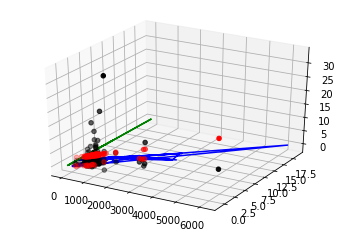

In [ ]:
#plotting the variables
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X2_test['SIZE'], X2_test['SIGNED'],y2_test,c='black', marker='o')
ax.plot(X2_test['SIZE'],y2_pred,c='blue')
ax.plot(X2_test['SIGNED'],y2_pred,c='green')
ax.scatter(X2_test['SIZE'],X2_test['SIGNED'],y2_pred,c='red')

#np.polyfit(X2_test['SIZE'],y2_pred,deg=1)

array([0.18305049, 2.94125342])

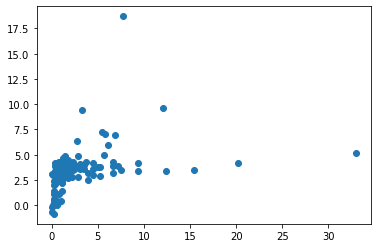

In [ ]:
plt.scatter(y2_test,y2_pred)

In [ ]:
#evaluations
cross_val_score(model1, X2_train, y2_train, cv=10).mean()

0.1084778300246811

In [ ]:
#error calcuation
print('MAE:', metrics.mean_absolute_error(y2_test,y2_pred))
print('MSE:', metrics.mean_squared_error(y2_test,y2_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test,y2_pred)))
print('R2 Square:', metrics.r2_score(y2_test,y2_pred))

MAE: 2.404483669613264
MSE: 15.405281715058234
RMSE: 3.924956269190554
R2 Square 0.08116029713230943


(array([ 1.,  9., 98., 15.,  2.,  2.,  1.,  0.,  0.,  1.]),
 array([-11.00474062,  -7.12109348,  -3.23744633,   0.64620081,
          4.52984796,   8.4134951 ,  12.29714225,  16.18078939,
         20.06443654,  23.94808368,  27.83173083]),
 <a list of 10 Patch objects>)

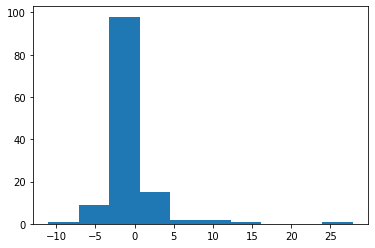

In [ ]:
plt.hist((y2_test - y2_pred), bins = 10)